In [1]:
%matplotlib notebook

In [2]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [3]:
pathHR = 'HR_comma_sep.csv'
df_HR = pd.read_csv(pathHR)
df_HR

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Data Cleaning

In [4]:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Note dataset has no specific ID variable such as employee ID.
# Check frequency for different variables

df_HR['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
## 'sales' column refers to the departments the employees are in
## Employees in each department
df_HR['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [7]:
df_HR.rename(columns={'sales':'Departments'}, inplace = True)
df_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
# Align coding for variables with those from EmployeeAttrition.csv (and related dfs)
## In EmployeeAttrition.csv: 1 = Stayers, 2 = Leavers
## In current dataset: 1 = Left; 0 = Stay. Code below amends any deviation.

df_HR['left'] = df_HR['left'].replace({1: 2})
df_HR['left'] = df_HR['left'].replace({0: 1})
df_HR['left'].value_counts()

1    11428
2     3571
Name: left, dtype: int64

In [9]:
# Align column name with similar variable from EmployeeAttrition.csv

df_HR.rename(columns={'left':'Current_status'}, inplace = True)
df_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Current_status,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,2,0,sales,low
1,0.80,0.86,5,262,6,0,2,0,sales,medium
2,0.11,0.88,7,272,4,0,2,0,sales,medium
3,0.72,0.87,5,223,5,0,2,0,sales,low
4,0.37,0.52,2,159,3,0,2,0,sales,low


In [10]:
df_HR['Current_status'].value_counts()

1    11428
2     3571
Name: Current_status, dtype: int64

## Turnover Count
11428 Stayers & 3571 Leavers

In [11]:
df_HR.describe().round(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Current_status,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,1.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,1.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,1.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,1.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,1.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,2.000,1.000


# DESCRIPTIVE STATISTICS & GROUPBY SUMMARIES

In [12]:
# Descriptive Statistics for entire dataset
## satisfaction_level: 0-1
## last_evaluation: 0-1
## number_project: up to 7
## time_spend_company: up to 10

HR_sumStats = pd.DataFrame(df_HR[["satisfaction_level",
                                  "last_evaluation",
                                  "number_project",
                                  "average_montly_hours",
                                  "time_spend_company"]].mean().round(3))

HR_sumStats.rename(columns={0:'Mean'}, inplace = True)
HR_sumStats

,Mean
satisfaction_level,0.613
last_evaluation,0.716
number_project,3.803
average_montly_hours,201.050
time_spend_company,3.498


In [13]:
# Descriptive Statistics by Stayers vs Leavers
## KIV values_count() for Work_accident, promotion_last_5years, Departments

HR_byStayLeave = df_HR.groupby('Current_status').mean()

## TBC Rename rows
# HR_byStayLeave.rename(rows={0:'Not promoted in last 5 years',
#                             1:'Promoted in the last 5 years'}, inplace = True)

HR_byStayLeave

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Current_status,,,,,,,
1,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
2,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [14]:
HR_byStayLeaveTP = HR_byStayLeave.transpose()
HR_byStayLeaveTP

Current_status,1,2
satisfaction_level,0.666810,0.440098
last_evaluation,0.715473,0.718113
number_project,3.786664,3.855503
average_montly_hours,199.060203,207.419210
time_spend_company,3.380032,3.876505
Work_accident,0.175009,0.047326
promotion_last_5years,0.026251,0.005321


In [15]:
# Descriptive Statistics by Departments

HR_byDepts = df_HR.groupby('Departments').aggregate([np.mean, np.median])
HR_byDepts

satisfaction_level        last_evaluation        number_project  \
                          mean median            mean median           mean   
Departments                                                                   
IT                    0.618142  0.660        0.716830   0.72       3.816626   
RandD                 0.619822  0.650        0.712122   0.71       3.853875   
accounting            0.582151  0.610        0.717718   0.73       3.825293   
hr                    0.598809  0.610        0.708850   0.72       3.654939   
management            0.621349  0.655        0.724000   0.73       3.860317   
marketing             0.618601  0.640        0.715886   0.71       3.687646   
product_mng           0.619634  0.640        0.714756   0.72       3.807095   
sales                 0.614447  0.640        0.709717   0.70       3.776329   
support               0.618300  0.650        0.723109   0.74       3.803948   
technical             0.607897  0.640        0.721099   0.73       3.877941   

                   average_montly_hours        time_spend_company         \
            median                 mean median               mean median   
Departments                                                                
IT               4           202.215974    199           3.468623      3   
RandD            4           200.800508    200           3.367217      3   
accounting       4           201.162973    199           3.522816      3   
hr               4           198.684709    197           3.355886      3   
management       4           201.249206    204           4.303175      3   
marketing        4           199.385781    198           3.569930      3   
product_mng      4           199.965632    198           3.475610      3   
sales            4           200.911353    201           3.534058      3   
support          4           200.758188    200           3.393001      3   
technical        4           202.497426    201           3.411397      3   

            Work_accident        Current_status        promotion_last_5years  \
                     mean median           mean median                  mean   
Departments                                                                    
IT               0.133659      0       1.222494      1              0.002445   
RandD            0.170267      0       1.153748      1              0.034307   
accounting       0.125163      0       1.265971      1              0.018253   
hr               0.120433      0       1.290934      1              0.020298   
management       0.163492      0       1.144444      1              0.109524   
marketing        0.160839      0       1.236597      1              0.050117   
product_mng      0.146341      0       1.219512      1              0.000000   
sales            0.141787      0       1.244928      1              0.024155   
support          0.154778      0       1.248991      1              0.008973   
technical        0.140074      0       1.256250      1              0.010294   

                    
            median  
Departments         
IT               0  
RandD            0  
accounting       0  
hr               0  
management       0  
marketing        0  
product_mng      0  
sales            0  
support          0  
technical        0

In [16]:
HR_byDeptsTP = HR_byDepts.transpose()
HR_byDeptsTP

Departments                           IT       RandD  accounting          hr  \
satisfaction_level    mean      0.618142    0.619822    0.582151    0.598809   
                      median    0.660000    0.650000    0.610000    0.610000   
last_evaluation       mean      0.716830    0.712122    0.717718    0.708850   
                      median    0.720000    0.710000    0.730000    0.720000   
number_project        mean      3.816626    3.853875    3.825293    3.654939   
                      median    4.000000    4.000000    4.000000    4.000000   
average_montly_hours  mean    202.215974  200.800508  201.162973  198.684709   
                      median  199.000000  200.000000  199.000000  197.000000   
time_spend_company    mean      3.468623    3.367217    3.522816    3.355886   
                      median    3.000000    3.000000    3.000000    3.000000   
Work_accident         mean      0.133659    0.170267    0.125163    0.120433   
                      median    0.000000    0.000000    0.000000    0.000000   
Current_status        mean      1.222494    1.153748    1.265971    1.290934   
                      median    1.000000    1.000000    1.000000    1.000000   
promotion_last_5years mean      0.002445    0.034307    0.018253    0.020298   
                      median    0.000000    0.000000    0.000000    0.000000   

Departments                   management   marketing  product_mng       sales  \
satisfaction_level    mean      0.621349    0.618601     0.619634    0.614447   
                      median    0.655000    0.640000     0.640000    0.640000   
last_evaluation       mean      0.724000    0.715886     0.714756    0.709717   
                      median    0.730000    0.710000     0.720000    0.700000   
number_project        mean      3.860317    3.687646     3.807095    3.776329   
                      median    4.000000    4.000000     4.000000    4.000000   
average_montly_hours  mean    201.249206  199.385781   199.965632  200.911353   
                      median  204.000000  198.000000   198.000000  201.000000   
time_spend_company    mean      4.303175    3.569930     3.475610    3.534058   
                      median    3.000000    3.000000     3.000000    3.000000   
Work_accident         mean      0.163492    0.160839     0.146341    0.141787   
                      median    0.000000    0.000000     0.000000    0.000000   
Current_status        mean      1.144444    1.236597     1.219512    1.244928   
                      median    1.000000    1.000000     1.000000    1.000000   
promotion_last_5years mean      0.109524    0.050117     0.000000    0.024155   
                      median    0.000000    0.000000     0.000000    0.000000   

Departments                      support   technical  
satisfaction_level    mean      0.618300    0.607897  
                      median    0.650000    0.640000  
last_evaluation       mean      0.723109    0.721099  
                      median    0.740000    0.730000  
number_project        mean      3.803948    3.877941  
                      median    4.000000    4.000000  
average_montly_hours  mean    200.758188  202.497426  
                      median  200.000000  201.000000  
time_spend_company    mean      3.393001    3.411397  
                      median    3.000000    3.000000  
Work_accident         mean      0.154778    0.140074  
                      median    0.000000    0.000000  
Current_status        mean      1.248991    1.256250  
                      median    1.000000    1.000000  
promotion_last_5years mean      0.008973    0.010294  
                      median    0.000000    0.000000

In [17]:
# Number of employees per department
df_HR['Departments'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments, dtype: int64

# Summary Statistics (Tenure by Past, Current, All Employees)

In [18]:
df_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Current_status,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,2,0,sales,low
1,0.80,0.86,5,262,6,0,2,0,sales,medium
2,0.11,0.88,7,272,4,0,2,0,sales,medium
3,0.72,0.87,5,223,5,0,2,0,sales,low
4,0.37,0.52,2,159,3,0,2,0,sales,low


In [19]:
# Assumption: time_spend_company in Years
## Add variable Tenure (Days)

Tenure_Days = df_HR['time_spend_company']*365

df_HR['Tenure (Days)'] = Tenure_Days

df_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Current_status,promotion_last_5years,Departments,salary,Tenure (Days)
0,0.38,0.53,2,157,3,0,2,0,sales,low,1095
1,0.80,0.86,5,262,6,0,2,0,sales,medium,2190
2,0.11,0.88,7,272,4,0,2,0,sales,medium,1460
3,0.72,0.87,5,223,5,0,2,0,sales,low,1825
4,0.37,0.52,2,159,3,0,2,0,sales,low,1095


In [20]:
HR_byCurrStatus = df_HR.groupby('Current_status').aggregate([np.mean, np.median])
HR_byCurrStatus

satisfaction_level        last_evaluation         \
                             mean median            mean median   
Current_status                                                    
1                        0.666810   0.69        0.715473   0.71   
2                        0.440098   0.41        0.718113   0.79   

               number_project        average_montly_hours         \
                         mean median                 mean median   
Current_status                                                     
1                    3.786664      4           199.060203    198   
2                    3.855503      4           207.419210    224   

               time_spend_company        Work_accident         \
                             mean median          mean median   
Current_status                                                  
1                        3.380032      3      0.175009      0   
2                        3.876505      4      0.047326      0   

               promotion_last_5years        Tenure (Days)         
                                mean median          mean median  
Current_status                                                    
1                           0.026251      0   1233.711498   1095  
2                           0.005321      0   1414.924391   1460

In [21]:
HR_byCurrStatus.transpose()

Current_status                          1            2
satisfaction_level    mean       0.666810     0.440098
                      median     0.690000     0.410000
last_evaluation       mean       0.715473     0.718113
                      median     0.710000     0.790000
number_project        mean       3.786664     3.855503
                      median     4.000000     4.000000
average_montly_hours  mean     199.060203   207.419210
                      median   198.000000   224.000000
time_spend_company    mean       3.380032     3.876505
                      median     3.000000     4.000000
Work_accident         mean       0.175009     0.047326
                      median     0.000000     0.000000
promotion_last_5years mean       0.026251     0.005321
                      median     0.000000     0.000000
Tenure (Days)         mean    1233.711498  1414.924391
                      median  1095.000000  1460.000000

In [22]:
HR_all = df_HR.aggregate([np.mean,np.median])
HR_all

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Current_status,promotion_last_5years,Tenure (Days)
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.14461,1.238083,0.021268,1276.855124
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.00000,1.000000,0.000000,1095.000000


In [23]:
HR_all.transpose()

,mean,median
satisfaction_level,0.612834,0.64
last_evaluation,0.716102,0.72
number_project,3.803054,4.00
average_montly_hours,201.050337,200.00
time_spend_company,3.498233,3.00
Work_accident,0.144610,0.00
Current_status,1.238083,1.00
promotion_last_5years,0.021268,0.00
Tenure (Days),1276.855124,1095.00


In [24]:
# Brute force coded for comparison

summary_df = pd.DataFrame({
    "Group": ["Past Employees", "Current Employees", "All Employees"],
    "Mean Tenure (days)": [1415, 1234, 1277],
    "Median Tenure (days)": [1460, 1095, 1095]
})
summary_df

,Group,Mean Tenure (days),Median Tenure (days)
0,Past Employees,1415,1460
1,Current Employees,1234,1095
2,All Employees,1277,1095


In [25]:
sumTenureDays = summary_df.transpose()
sumTenureDays.rename(columns={0:'Past Employees',
                              1:'Current Employees',
                              2:'All Employees'}, inplace = True)
sumTenureDays = sumTenureDays.drop('Group')
sumTenureDays

,Past Employees,Current Employees,All Employees
Mean Tenure (days),1415,1234,1277
Median Tenure (days),1460,1095,1095


In [26]:
# 1 = Stayers, 2 = Leavers

stayer_stats = df_HR.loc[df_HR['Current_status'] ==1]
leaver_stats = df_HR.loc[df_HR['Current_status'] ==2]

# To check that dataframe is generated
## stayer_stats.head()
## leaver_stats.head() 

In [27]:
## SAMPLE CODE for Summary Stats from a GroupBy Function
# HR_byDepts_companytime = pd.DataFrame(HR_byDepts["time_spend_company"].aggregate([np.mean, np.median, np.var, np.std]).round(2))
# HR_byDepts_companytime

# Time spent in company (Tenure) by Departments

<IPython.core.display.Javascript object>


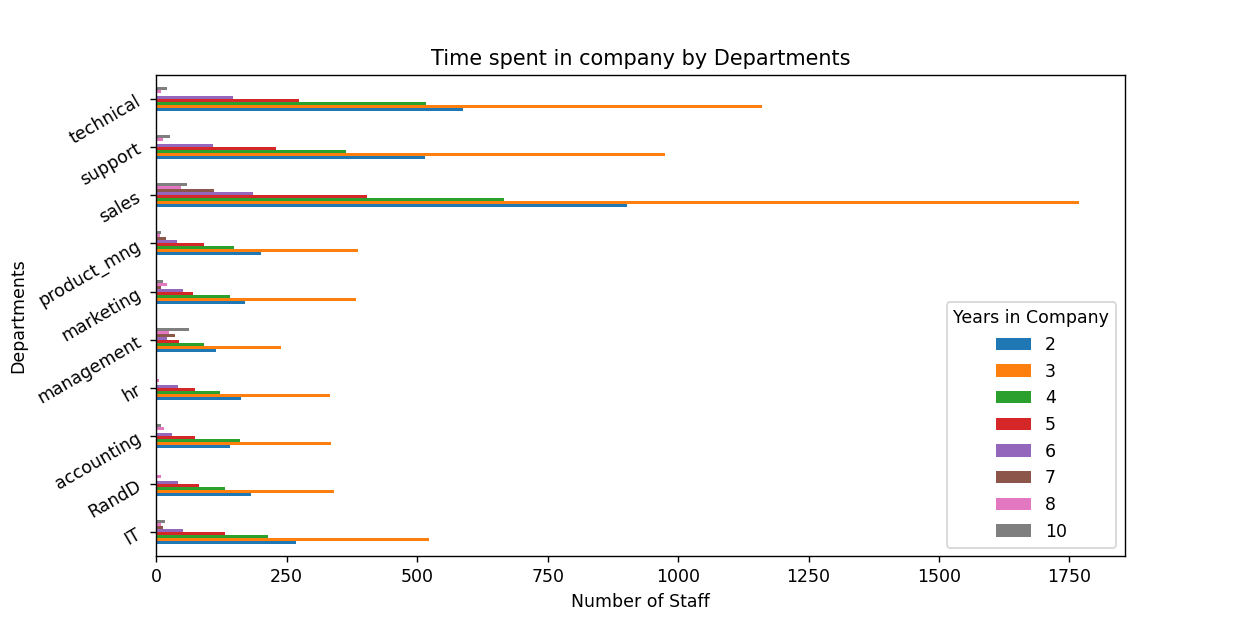

In [28]:
# Compare tenure by department
## Bar Chart
### 10 Departments & 10 Levels of 'time_spend_company'

timeCompany_depts = df_HR.groupby(['Departments','time_spend_company'])['time_spend_company'].count().unstack('time_spend_company').reset_index()

ax = timeCompany_depts.plot.barh(x = 'Departments', rot = 30, figsize = (10,5))
plt.title("Time spent in company by Departments")
plt.ylabel("Departments")
plt.xlabel("Number of Staff")
plt.legend(title = 'Years in Company')
plt.show()


## Comments on time_spend_company by Departments

Most of the employees, across all the departments, have stayed with the company for about 3 years.

# Satisfaction by Department

In [29]:
satisfaction_deptsAVE = df_HR.groupby(['Departments'])['satisfaction_level'].mean()
satisfaction_deptsAVE

Departments
IT             0.618142
RandD          0.619822
accounting     0.582151
hr             0.598809
management     0.621349
marketing      0.618601
product_mng    0.619634
sales          0.614447
support        0.618300
technical      0.607897
Name: satisfaction_level, dtype: float64

<IPython.core.display.Javascript object>


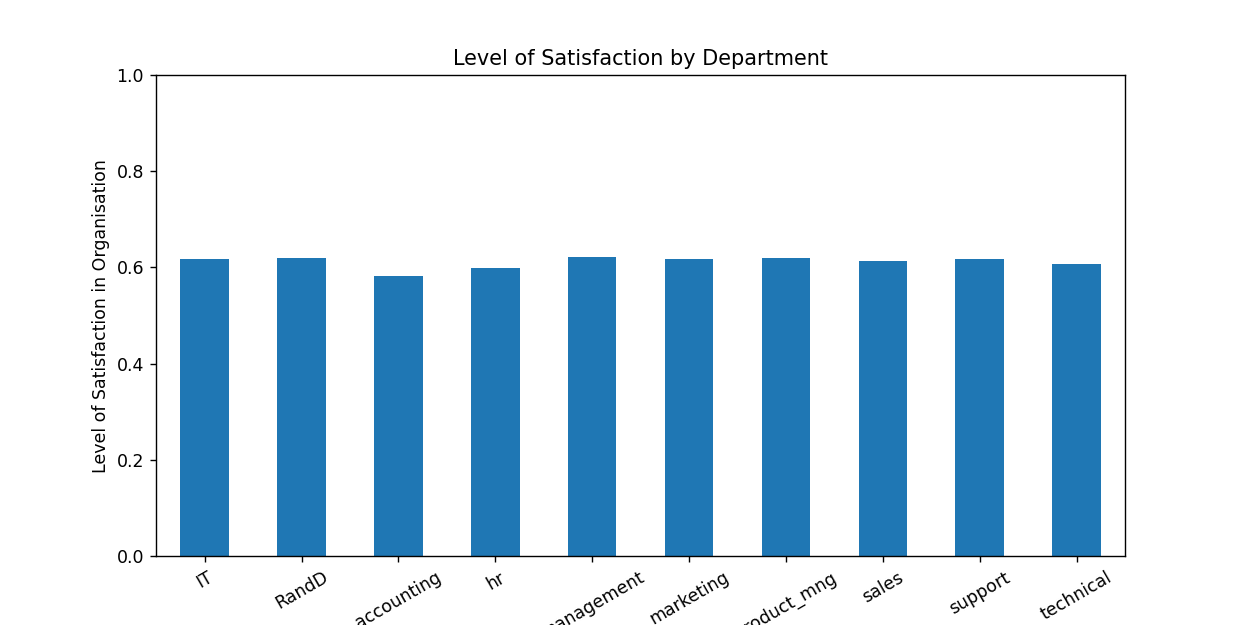

In [30]:
figs, axs = plt.subplots(figsize = (10,5))

satisfaction_deptsAVE.plot(kind ="bar", figsize =(10,5))
plt.title("Level of Satisfaction by Department")
plt.xlabel("Departments")
plt.xticks(rotation=30)
plt.ylabel("Level of Satisfaction in Organisation")
plt.ylim(0,1)
plt.show()

Department with lowest satisfaction: Accounting

In [31]:
# sort by level of satisfaction....

<IPython.core.display.Javascript object>


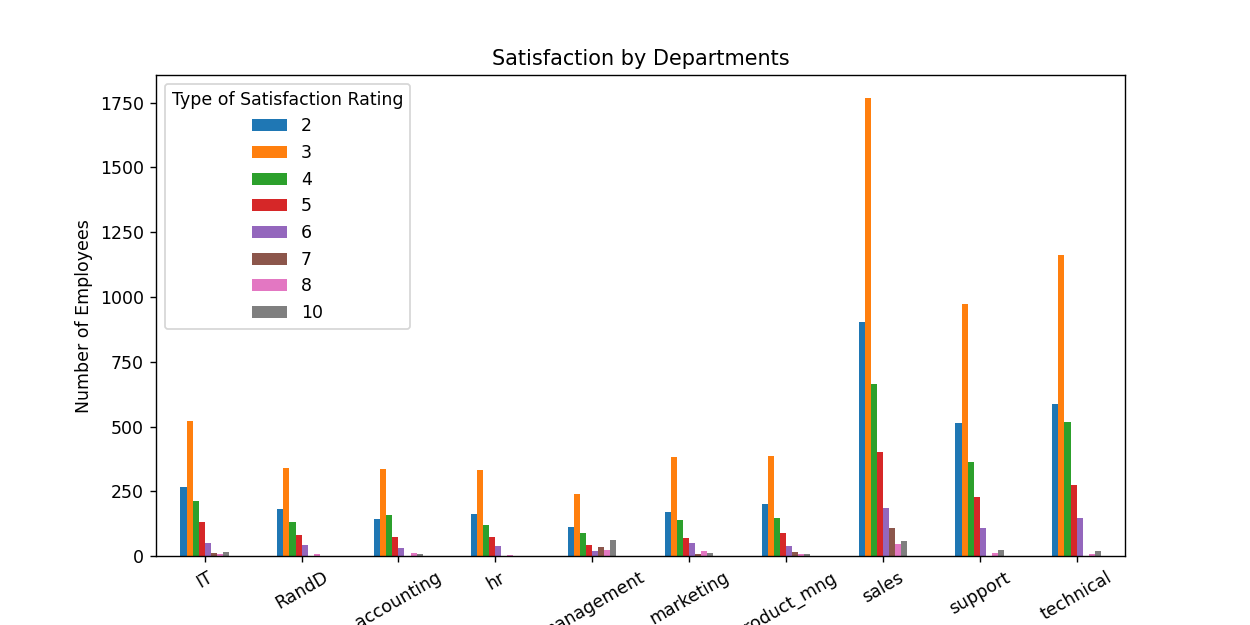

In [32]:
satisfaction_depts = df_HR.groupby(['Departments','satisfaction_level'])['satisfaction_level'].count()

ax = timeCompany_depts.plot.bar(x = 'Departments', rot = 30, figsize = (10,5))
plt.title("Satisfaction by Departments")
plt.ylabel("Number of Employees")
plt.xlabel("Level of Satisfaction")
plt.legend(title = 'Type of Satisfaction Rating')
plt.show()

# Trends relating to Recent Promotions

In [33]:
# Count number of employees who did/did not receive a promotion in the last 5 years.

df_HR['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [34]:
# Descriptive Statistics by employees who did/did not receiver a promotion in the last 5 years.

HR_byPromolst5yrs = df_HR.groupby('promotion_last_5years').aggregate([np.mean, np.median])
HR_byPromolst5yrs

satisfaction_level        last_evaluation         \
                                    mean median            mean median   
promotion_last_5years                                                    
0                               0.611895   0.64        0.716321   0.72   
1                               0.656019   0.68        0.706019   0.71   

                      number_project        average_montly_hours         \
                                mean median                 mean median   
promotion_last_5years                                                     
0                           3.804155      4           201.076431    200   
1                           3.752351      4           199.849530    206   

                      time_spend_company        Work_accident         \
                                    mean median          mean median   
promotion_last_5years                                                  
0                               3.483719      3      0.142575      0   
1                               4.166144      3      0.238245      0   

                      Current_status        Tenure (Days)         
                                mean median          mean median  
promotion_last_5years                                             
0                           1.241962      1   1271.557561   1095  
1                           1.059561      1   1520.642633   1095

In [35]:
# HR_byPromolst5yrs.rename(columns={0:'Not promoted in last 5 years',
#                                   1:'Promoted in the last 5 years'}, inplace = True)

HR_byPromolst5yrs.transpose()

promotion_last_5years                  0            1
satisfaction_level   mean       0.611895     0.656019
                     median     0.640000     0.680000
last_evaluation      mean       0.716321     0.706019
                     median     0.720000     0.710000
number_project       mean       3.804155     3.752351
                     median     4.000000     4.000000
average_montly_hours mean     201.076431   199.849530
                     median   200.000000   206.000000
time_spend_company   mean       3.483719     4.166144
                     median     3.000000     3.000000
Work_accident        mean       0.142575     0.238245
                     median     0.000000     0.000000
Current_status       mean       1.241962     1.059561
                     median     1.000000     1.000000
Tenure (Days)        mean    1271.557561  1520.642633
                     median  1095.000000  1095.000000

## Investigation on possible unfair rewards

On average, performance of those who did not receive a promotion in the last 5 years (0.716/1) was greater than those who received a promotion in the last 5 years (0.706019).

In [36]:
# Descriptive Statistics by employees who did/did not receiver a promotion in the last 5 years and staying(1)/leaving(2)

HR_by_promo_left = df_HR.groupby(['promotion_last_5years','Current_status']).aggregate([np.mean, np.median])
HR_by_promo_left

satisfaction_level         \
                                                   mean median   
promotion_last_5years Current_status                             
0                     1                        0.666766  0.690   
                      2                        0.439992  0.410   
1                     1                        0.668433  0.695   
                      2                        0.460000  0.440   

                                     last_evaluation        number_project  \
                                                mean median           mean   
promotion_last_5years Current_status                                         
0                     1                     0.715527  0.715       3.786395   
                      2                     0.718806  0.790       3.859797   
1                     1                     0.713467  0.710       3.796667   
                      2                     0.588421  0.560       3.052632   

                                            average_montly_hours         \
                                     median                 mean median   
promotion_last_5years Current_status                                      
0                     1                   4           199.001168  198.0   
                      2                   4           207.577984  224.5   
1                     1                   4           201.250000  208.0   
                      2                   2           177.736842  160.0   

                                     time_spend_company        Work_accident  \
                                                   mean median          mean   
promotion_last_5years Current_status                                           
0                     1                        3.357297      3      0.173257   
                      2                        3.879786      4      0.046453   
1                     1                        4.223333      3      0.240000   
                      2                        3.263158      3      0.210526   

                                            Tenure (Days)         
                                     median          mean median  
promotion_last_5years Current_status                              
0                     1                   0   1225.413372   1095  
                      2                   0   1416.121903   1460  
1                     1                   0   1541.516667   1095  
                      2                   0   1191.052632   1095

Current_status: 1 = Stayers, 2 = Leavers 
promotion_last_5years: 1 = Yes; 0 = No
2x2 comparison

## Subset 1: No - promotion_last_5years & Leave Org

Subset's mean rating on their last_evaluation was the highest out of all groups. They may have left because they didn't received a promotion in the last 5 years despite being on average the top performers (last_evaluation: 0.718806).

This same subset was working more than the others as well (average_montly_hours = 207.577).

Overworked and underappreciated employees leave.

## Next Cell - Work in Progress

In [37]:
# # Compare tenure by Current_status
# ## Bar Chart
# ### 1 = Stayers, 2 = Leavers

# timeCompany_left = df_HR.groupby(['Current_status','time_spend_company'])['time_spend_company'].count().unstack('time_spend_company').reset_index()

# ax = timeCompany_left.plot.bar(y = 'Current_status', rot = 0, figsize = (10,5))
# plt.title("Time spent in company by Departments")
# plt.ylabel("Current_status")
# plt.xlabel("Number of Staff")
# plt.legend(title = 'Years in Company')
# plt.show()

# Salary Trends

In [38]:
df_HR

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Current_status,promotion_last_5years,Departments,salary,Tenure (Days)
0,0.38,0.53,2,157,3,0,2,0,sales,low,1095
1,0.80,0.86,5,262,6,0,2,0,sales,medium,2190
2,0.11,0.88,7,272,4,0,2,0,sales,medium,1460
3,0.72,0.87,5,223,5,0,2,0,sales,low,1825
4,0.37,0.52,2,159,3,0,2,0,sales,low,1095
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,2,0,support,low,1095
14995,0.37,0.48,2,160,3,0,2,0,support,low,1095
14996,0.37,0.53,2,143,3,0,2,0,support,low,1095
14997,0.11,0.96,6,280,4,0,2,0,support,low,1460


## Comparing Salary by Average Monthly Hours, Number of Projects, and Time at Company

Fig1 average_montly_hours x Salary

In [39]:
# Create separate dfs for each salary band

salLOW = df_HR.loc[df_HR['salary']=='low', :]
salMED = df_HR.loc[df_HR['salary']=='medium', :]
salHIGH = df_HR.loc[df_HR['salary']=='high', :]

salHIGH.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Current_status,promotion_last_5years,Departments,salary,Tenure (Days)
72,0.45,0.49,2,149,3,0,2,0,product_mng,high,1095
111,0.09,0.85,6,289,4,0,2,0,hr,high,1460
189,0.44,0.51,2,156,3,0,2,0,technical,high,1095
267,0.45,0.53,2,129,3,0,2,0,technical,high,1095
306,0.37,0.46,2,149,3,0,2,0,marketing,high,1095


In [40]:
sal_monthlyHRs = df_HR.groupby('salary')['average_montly_hours'].mean()
print(sal_monthlyHRs)

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64


<IPython.core.display.Javascript object>


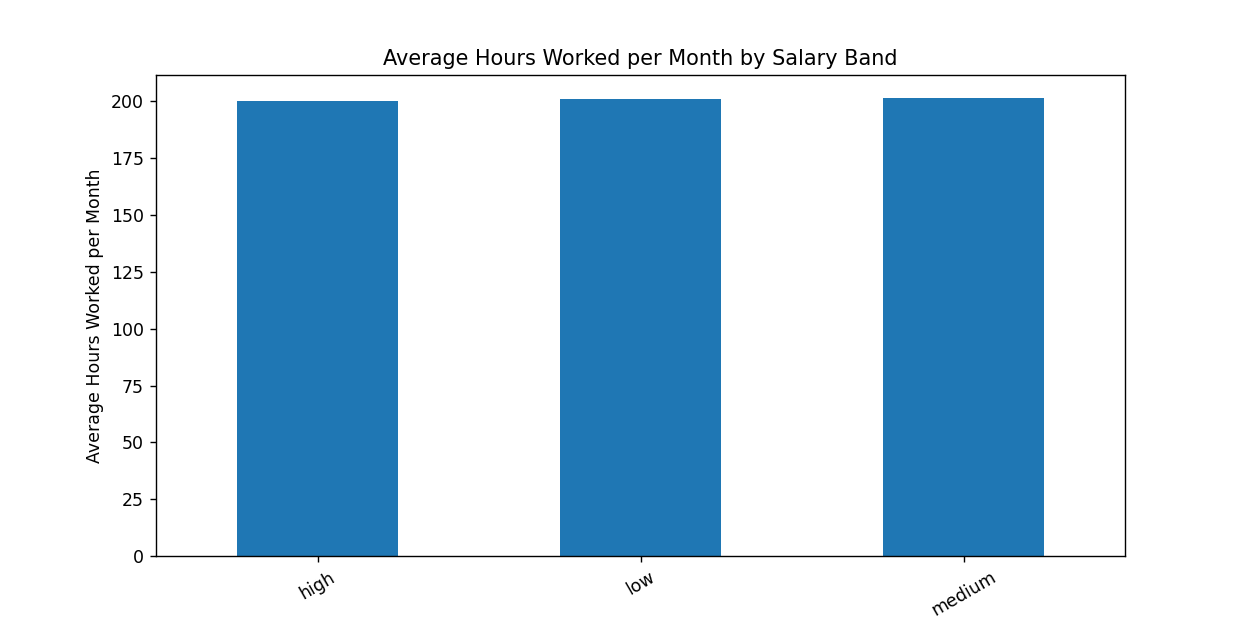

In [41]:
figs, ax3 = plt.subplots(figsize = (10,5))

sal_monthlyHRs.plot(kind ="bar", figsize =(10,5))
plt.title("Average Hours Worked per Month by Salary Band")
plt.xlabel("Salary Band")
plt.xticks(rotation=30)
plt.ylabel("Average Hours Worked per Month")
plt.show()

## run a further groupby Current_status

Fig number_project x Salary

In [42]:
sal_projects = df_HR.groupby('salary')['number_project'].mean()
print(sal_projects)

salary
high      3.767179
low       3.799891
medium    3.813528
Name: number_project, dtype: float64


<IPython.core.display.Javascript object>


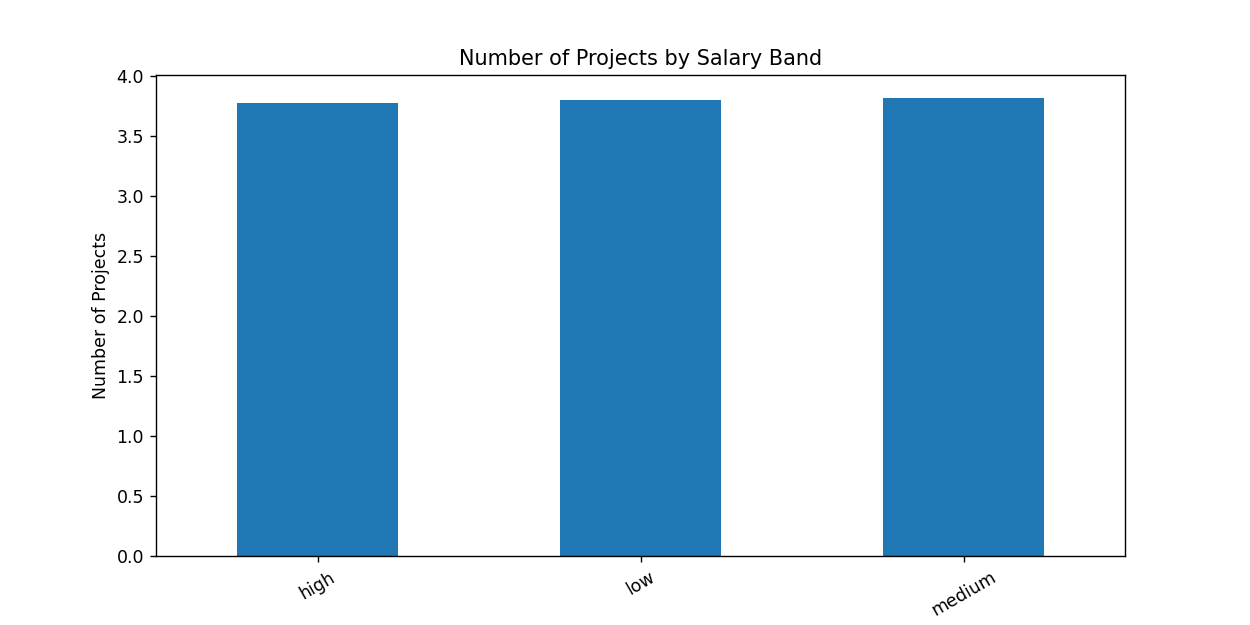

In [43]:
figs, ax4 = plt.subplots(figsize = (10,5))

sal_projects.plot(kind ="bar", figsize =(10,5))
plt.title("Number of Projects by Salary Band")
plt.xlabel("Salary Band")
plt.xticks(rotation=30)
plt.ylabel("Number of Projects")
plt.show()

No obvious differences between salary groups in terms of number projects and average monthly hours worked. See below for exact means.

In [44]:
print(sal_monthlyHRs)

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64


In [45]:
print(sal_projects)

salary
high      3.767179
low       3.799891
medium    3.813528
Name: number_project, dtype: float64


Fig time_spend_company x Salary

Is experience rewarded?

In [46]:
sal_companytime = df_HR.groupby('salary')['time_spend_company'].mean()
print(sal_companytime)

salary
high      3.692805
low       3.438218
medium    3.529010
Name: time_spend_company, dtype: float64


<IPython.core.display.Javascript object>


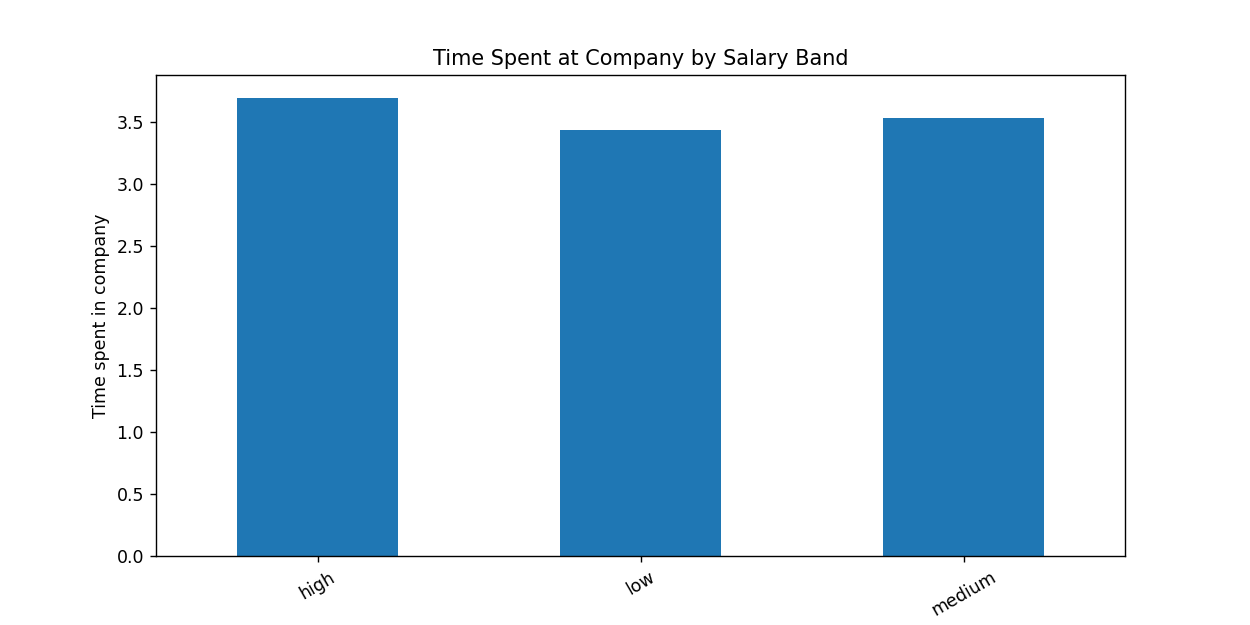

In [47]:
figs, ax5 = plt.subplots()

sal_companytime.plot(kind ="bar", figsize =(10,5))
plt.title("Time Spent at Company by Salary Band")
plt.xlabel("Salary Band")
plt.xticks(rotation=30)
plt.ylabel("Time spent in company")
plt.show()

In [61]:
sal_recentPERF = df_HR.groupby('salary')['last_evaluation'].mean()
print(sal_recentPERF)

salary
high      0.704325
low       0.717017
medium    0.717322
Name: last_evaluation, dtype: float64


<IPython.core.display.Javascript object>


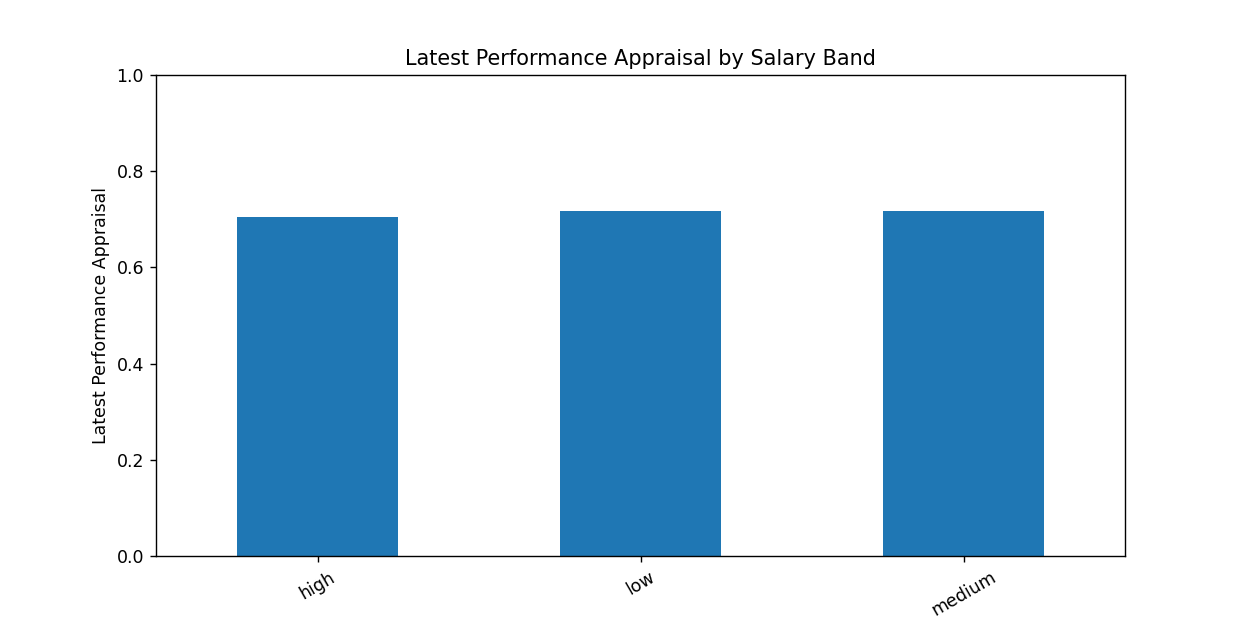

In [63]:
figs, ax6 = plt.subplots()

sal_recentPERF.plot(kind ="bar", figsize =(10,5))
plt.title("Latest Performance Appraisal by Salary Band")
plt.xlabel("Salary Band")
plt.xticks(rotation=30)
plt.ylabel("Latest Performance Appraisal")
plt.ylim(0,1)
plt.show()

# Is satisfaction affected by Average Monthly Hours, Number of Projects, Tenure in Years?

Finding: Unlikely as correlation between Satisfaction and those two independent variables are very small.

CORRELATION
Fig2 average_montly_hours x satisfaction_level

<IPython.core.display.Javascript object>


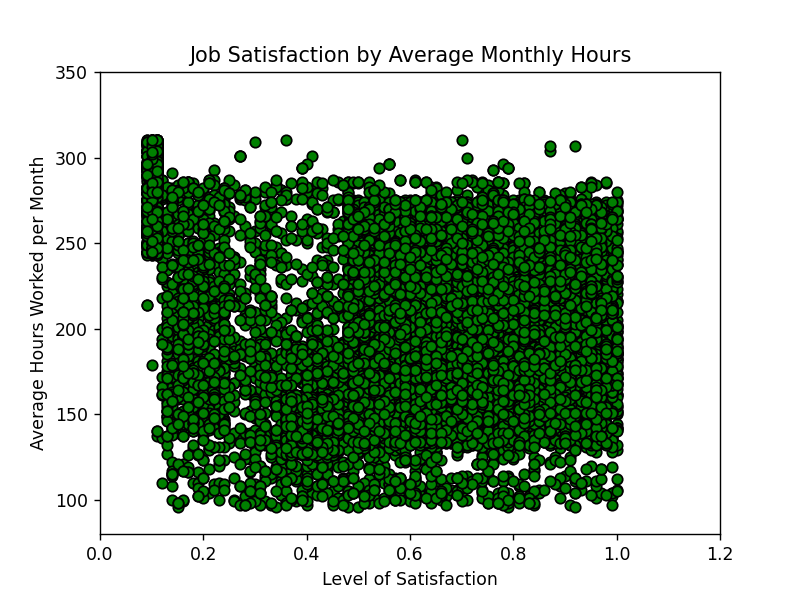

In [48]:
satisfaction = df_HR['satisfaction_level']
monthlyHRs = df_HR['average_montly_hours']

fig, ax1 = plt.subplots()

ax1.scatter(satisfaction, monthlyHRs, marker = 'o',
            facecolors = "green", edgecolors = "black")
ax1.set_xlabel("Level of Satisfaction")
ax1.set_xlim(0,1.2)
ax1.set_ylabel("Average Hours Worked per Month")
ax1.set_ylim(80,350)
ax1.set_title("Job Satisfaction by Average Monthly Hours")
plt.show()

In [49]:
print(f"The correlation coefficient between Job Satisfaction and Average Monthly Hours is {round(stats.pearsonr(satisfaction, monthlyHRs)[0],2)}.")

The correlation coefficient between Job Satisfaction and Average Monthly Hours is -0.02.


CORRELATION Fig3 number_project x satisfaction_level

<IPython.core.display.Javascript object>


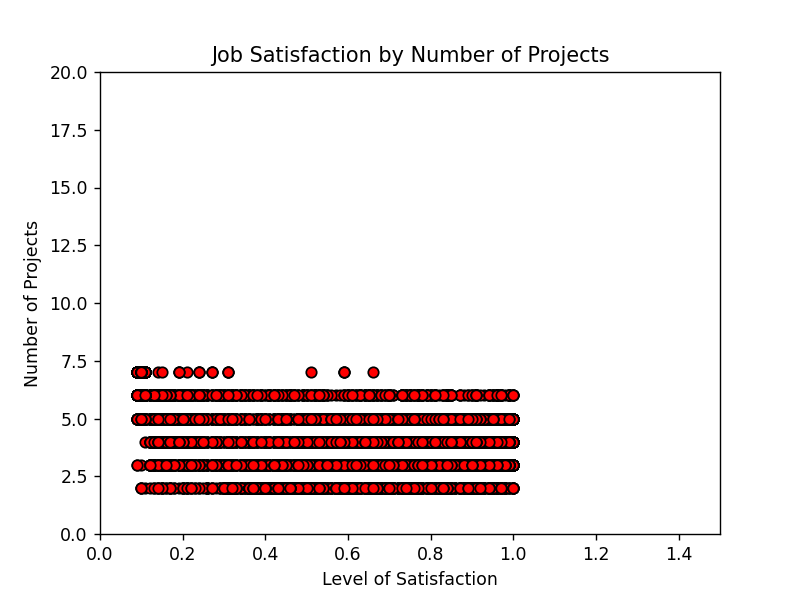

In [50]:
satisfaction = df_HR['satisfaction_level']
projectLoad = df_HR['number_project']

fig, ax1 = plt.subplots()

ax1.scatter(satisfaction, projectLoad, marker = 'o',
            facecolors = "red", edgecolors = "black")
ax1.set_xlabel("Level of Satisfaction")
ax1.set_xlim(0,1.5)
ax1.set_ylabel("Number of Projects")
ax1.set_ylim(0,20)
ax1.set_title("Job Satisfaction by Number of Projects")
plt.show()

In [51]:
print(f"The correlation coefficient between Job Satisfaction and Number of Projects is {round(stats.pearsonr(satisfaction, projectLoad)[0],2)}.")

The correlation coefficient between Job Satisfaction and Number of Projects is -0.14.


CORRELATION Fig4 number_project x average_montly_hours

<IPython.core.display.Javascript object>


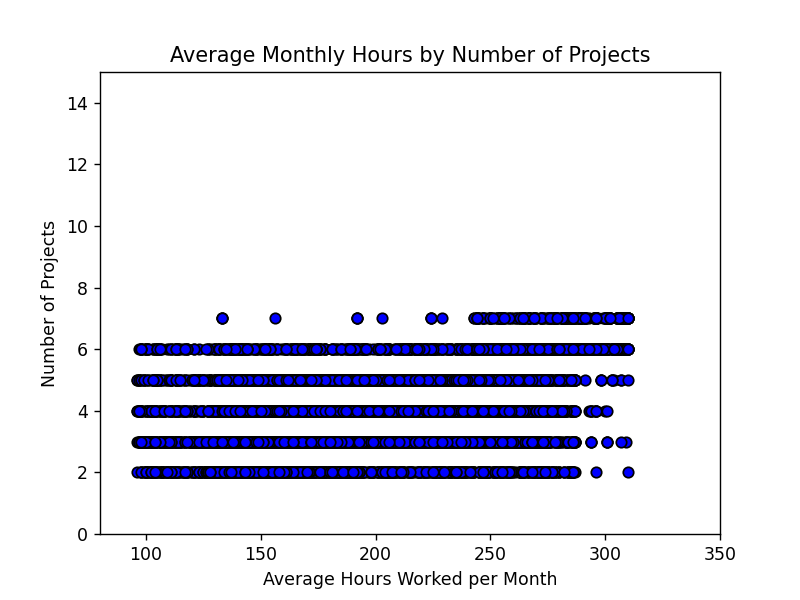

In [52]:
monthlyHRs = df_HR['average_montly_hours']
projectLoad = df_HR['number_project']

fig, ax1 = plt.subplots()

ax1.scatter(monthlyHRs, projectLoad, marker = 'o',
            facecolors = "blue", edgecolors = "black")
ax1.set_xlabel("Average Hours Worked per Month")
ax1.set_xlim(80,350)
ax1.set_ylabel("Number of Projects")
ax1.set_ylim(0,15)
ax1.set_title("Average Monthly Hours by Number of Projects")
plt.show()

In [53]:
print(f"The correlation coefficient between Average Hours Worked per Month and Number of Projects is {round(stats.pearsonr(monthlyHRs, projectLoad)[0],2)}.")

The correlation coefficient between Average Hours Worked per Month and Number of Projects is 0.42.


<IPython.core.display.Javascript object>


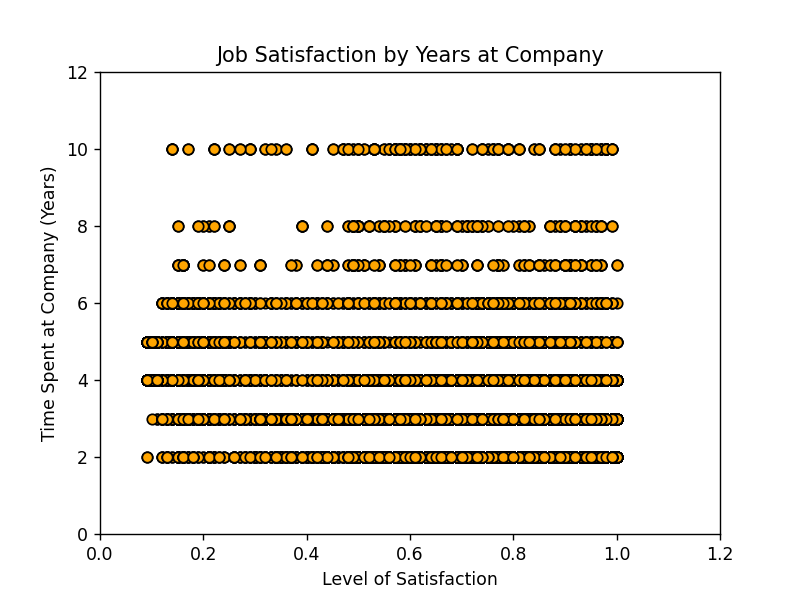

In [54]:
satisfaction = df_HR['satisfaction_level']
TenureYrs = df_HR['time_spend_company']

fig, ax1 = plt.subplots()

ax1.scatter(satisfaction, TenureYrs, marker = 'o',
            facecolors = "Orange", edgecolors = "black")
ax1.set_xlabel("Level of Satisfaction")
ax1.set_xlim(0,1.2)
ax1.set_ylabel("Time Spent at Company (Years)")
ax1.set_ylim(0,12)
ax1.set_title("Job Satisfaction by Years at Company")
plt.show()

In [55]:
print(f"The correlation coefficient between Satisfaction and Tenure(Years) is {round(stats.pearsonr(satisfaction, TenureYrs)[0],2)}.")

The correlation coefficient between Satisfaction and Tenure(Years) is -0.1.


In [56]:
## TBC is Satisfaction x Tenure (Years) correlation significant?

# Consider Work Accidents

In [57]:
HR_by_accident_left = df_HR.groupby(['Work_accident','Current_status']).aggregate([np.mean, np.median])
HR_by_accident_left

satisfaction_level        last_evaluation         \
                                           mean median            mean median   
Work_accident Current_status                                                    
0             1                        0.667122   0.69        0.716027  0.720   
              2                        0.439753   0.41        0.718195  0.785   
1             1                        0.665335   0.68        0.712865  0.710   
              2                        0.447041   0.41        0.716450  0.790   

                             number_project        average_montly_hours  \
                                       mean median                 mean   
Work_accident Current_status                                              
0             1                    3.786169      4           198.991090   
              2                    3.858907      4           207.542622   
1             1                    3.789000      4           199.386000   
              2                    3.786982      4           204.934911   

                                    time_spend_company         \
                             median               mean median   
Work_accident Current_status                                    
0             1               198.0           3.360416      3   
              2               224.5           3.875367      4   
1             1               199.0           3.472500      3   
              2               219.0           3.899408      4   

                             promotion_last_5years        Tenure (Days)         
                                              mean median          mean median  
Work_accident Current_status                                                    
0             1                           0.024183      0   1226.551761   1095  
              2                           0.004409      0   1414.509112   1460  
1             1                           0.036000      0   1267.462500   1095  
              2                           0.023669      0   1423.284024   1460

In [58]:
HR_by_accident_left.transpose()
# 1 = Stayers, 2 = Leavers

Work_accident                           0                         1  \
Current_status                          1            2            1   
satisfaction_level    mean       0.667122     0.439753     0.665335   
                      median     0.690000     0.410000     0.680000   
last_evaluation       mean       0.716027     0.718195     0.712865   
                      median     0.720000     0.785000     0.710000   
number_project        mean       3.786169     3.858907     3.789000   
                      median     4.000000     4.000000     4.000000   
average_montly_hours  mean     198.991090   207.542622   199.386000   
                      median   198.000000   224.500000   199.000000   
time_spend_company    mean       3.360416     3.875367     3.472500   
                      median     3.000000     4.000000     3.000000   
promotion_last_5years mean       0.024183     0.004409     0.036000   
                      median     0.000000     0.000000     0.000000   
Tenure (Days)         mean    1226.551761  1414.509112  1267.462500   
                      median  1095.000000  1460.000000  1095.000000   

Work_accident                              
Current_status                          2  
satisfaction_level    mean       0.447041  
                      median     0.410000  
last_evaluation       mean       0.716450  
                      median     0.790000  
number_project        mean       3.786982  
                      median     4.000000  
average_montly_hours  mean     204.934911  
                      median   219.000000  
time_spend_company    mean       3.899408  
                      median     4.000000  
promotion_last_5years mean       0.023669  
                      median     0.000000  
Tenure (Days)         mean    1423.284024  
                      median  1460.000000

# Exclude Work_accidents = 1

Remove confound of employees leaving because of work accidents

In [59]:
df_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Current_status,promotion_last_5years,Departments,salary,Tenure (Days)
0,0.38,0.53,2,157,3,0,2,0,sales,low,1095
1,0.80,0.86,5,262,6,0,2,0,sales,medium,2190
2,0.11,0.88,7,272,4,0,2,0,sales,medium,1460
3,0.72,0.87,5,223,5,0,2,0,sales,low,1825
4,0.37,0.52,2,159,3,0,2,0,sales,low,1095


In [65]:
NoWkAccid = df_HR.loc[df_HR['Work_accident'] ==0]
NoWkAccid.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Current_status,promotion_last_5years,Departments,salary,Tenure (Days)
0,0.38,0.53,2,157,3,0,2,0,sales,low,1095
1,0.80,0.86,5,262,6,0,2,0,sales,medium,2190
2,0.11,0.88,7,272,4,0,2,0,sales,medium,1460
3,0.72,0.87,5,223,5,0,2,0,sales,low,1825
4,0.37,0.52,2,159,3,0,2,0,sales,low,1095


In [71]:
NoWkAccid['Current_status'].value_counts()

1    9428
2    3402
Name: Current_status, dtype: int64

In [73]:
NoWkAccid_CurrStat = df_HR.groupby('Current_status').mean()
NoAccid_Sum = NoWkAccid_CurrStat.transpose()
NoAccid_Sum.rename(columns={1:'Current Employees', 2:'Past Employees'}, inplace = True)
NoAccid_Sum

Current_status,Current Employees,Past Employees
satisfaction_level,0.666810,0.440098
last_evaluation,0.715473,0.718113
number_project,3.786664,3.855503
average_montly_hours,199.060203,207.419210
time_spend_company,3.380032,3.876505
Work_accident,0.175009,0.047326
promotion_last_5years,0.026251,0.005321
Tenure (Days),1233.711498,1414.924391


## Run chisq on subset with accidents =1 - distribution by chance into Current_status. See if accidents did leave to them leaving organisation. Inform decision to look only at no accidents.

# CONCLUSIONS on Qns

In [60]:
# Research Question: 
## 1) Who is leaving? Why? (Promotions/Recognition; Salary; Type of Work Comparison). 
## 2) Factors specific to dataset (i. workload; ii. commute time)